# VizieR: 2MASS

In [1]:
# generic imports for making a synth ccd image
%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use('dark_background')
import numpy as np
import scipy as sp
plt.rcParams['image.origin'] = 'lower' 
from astroquery.simbad import Simbad
from astroquery.vizier import Vizier
from astropy.coordinates import SkyCoord
import astropy.coordinates as coord
import astropy.units as u

gzip was not found on your system! You should solve this issue for astroquery.eso to be at its best!
On POSIX system: make sure gzip is installed and in your path!On Windows: same for 7-zip (http://www.7-zip.org)!


In [2]:
Vizier = Vizier(timeout=3000)

In [3]:
Vizier.ROW_LIMIT = 3e5
rslt = Vizier.query_constraints(catalog="II/246", GLAT='<2 & >-2', Kmag='<7', GLON='<10 | >350')[0]
crds = coord.SkyCoord(rslt['RAJ2000'], rslt['DEJ2000'], frame='fk5', unit=(u.deg, u.deg)).galactic

Text(0.5, 1.0, 'Number of sources with K<7 per 20x20 arcminute region')

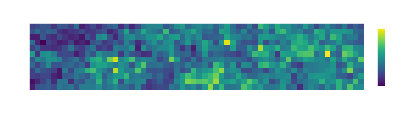

In [4]:
gridy,gridx = np.mgrid[-2:2:0.333, -10:10:0.333]
his,xe,ye = np.histogram2d(crds.galactic.l.wrap_at(180*u.deg).deg, crds.galactic.b.deg, bins=[gridx[0,:], gridy[:,0]])

fig = plt.figure(1)
fig.clf()
ax = fig.gca()
plt.imshow(his.T, extent=[xe.min(),xe.max(),ye.min(),ye.max()])
ax.set_aspect('equal') #gridx.shape[1]/gridx.shape[0])
cax = fig.add_axes([0.93, 0.4, 0.02, 0.2])
plt.colorbar(cax=cax)

ax.set_xlabel("Galactic Longitude")
ax.set_xlabel("Galactic Latitude")
ax.set_title("Number of sources with K<7 per 20x20 arcminute region")

In [5]:
v = Vizier(columns=['_RAJ2000', '_DEJ2000','*'], column_filters={"Kmag":"<7"})

In [6]:
reg_2mass = v.query_region(coord.SkyCoord(ra=261.931236, dec=-36.346729,
                                             unit=(u.deg, u.deg),
                                             frame='icrs'),
                         width="0d25m0s",
                         catalog="II/246")[0]
crds_2mass = coord.SkyCoord(reg_2mass['RAJ2000'], reg_2mass['DEJ2000'], frame='fk5', unit=(u.deg, u.deg)).galactic

Text(0.5, 1.0, 'Number of sources with K<7 per 25x25 arcminute region')

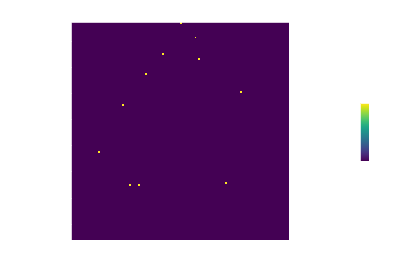

In [7]:
gridy,gridx = np.mgrid[-1.031:-.6143:0.003472222, -8.5235:-8.1068:0.003472222]
his,xe,ye = np.histogram2d(crds_2mass.galactic.l.wrap_at(180*u.deg).deg, crds_2mass.galactic.b.deg, bins=[gridx[0,:], gridy[:,0]])

fig = plt.figure(1)
fig.clf()
ax = fig.gca()
plt.imshow(his.T, extent=[xe.min(),xe.max(),ye.min(),ye.max()])
ax.set_aspect('equal') #gridx.shape[1]/gridx.shape[0])
cax = fig.add_axes([0.93, 0.4, 0.02, 0.2])
plt.colorbar(cax=cax)

ax.set_xlabel("Galactic Longitude")
ax.set_xlabel("Galactic Latitude")
ax.set_title("Number of sources with K<7 per 25x25 arcminute region")

In [8]:
all_2mass = Vizier.query_region(SkyCoord(2.5*u.deg, 0.1*u.deg, frame='galactic'), 
                           radius=12.5*u.arcmin, catalog="II/246")[0]
crds_3mass = coord.SkyCoord(all_2mass['RAJ2000'], all_2mass['DEJ2000'], frame='fk5', unit=(u.deg, u.deg)).galactic

Text(0.5, 1.0, 'Density by pixel')

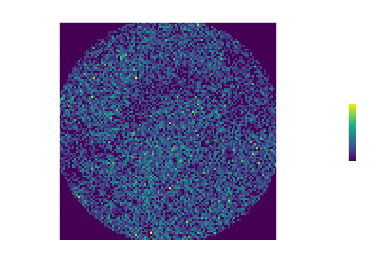

In [9]:
gridy,gridx = np.mgrid[-0.1:0.3:0.003472222, 2.3:2.7:0.003472222]
his,xe,ye = np.histogram2d(crds_3mass.galactic.l.wrap_at(180*u.deg).deg, crds_3mass.galactic.b.deg, bins=[gridx[0,:], gridy[:,0]])

fig = plt.figure(1)
fig.clf()
ax = fig.gca()
plt.imshow(his.T, extent=[xe.min(),xe.max(),ye.min(),ye.max()])
ax.set_aspect('equal') #gridx.shape[1]/gridx.shape[0])
cax = fig.add_axes([0.93, 0.4, 0.02, 0.2])
plt.colorbar(cax=cax)

ax.set_xlabel("Galactic Longitude")
ax.set_ylabel("Galactic Latitude")
ax.set_title("Density by pixel")

In [10]:
print(all_2mass["Hmag"])

 Hmag 
 mag  
------
14.660
14.874
14.705
14.423
13.408
13.136
14.334
12.029
14.588
13.963
   ...
13.405
13.870
12.756
15.067
12.886
12.798
12.127
11.536
13.369
13.201
Length = 16710 rows


# VizieR: VVV

In [11]:
rslt_vvv = Vizier.query_constraints(catalog=["II/337", "II/348"], GLAT='<2 & >-2', Kmag='<7', GLON='<10 | >350')[0]
crds_vvv = coord.SkyCoord(rslt_vvv['RAJ2000'], rslt_vvv['DEJ2000'], frame='fk5', unit=(u.deg, u.deg)).galactic

Text(0.5, 1.0, 'Number of sources with K<7 per 20x20 arcminute region')

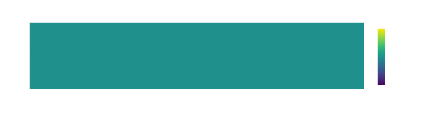

In [12]:
gridy,gridx = np.mgrid[-2:2:0.33, -10:10:0.333]
his,xe,ye = np.histogram2d(crds_vvv.galactic.l.wrap_at(180*u.deg).deg, crds_vvv.galactic.b.deg, bins=[gridx[0,:], gridy[:,0]])

fig = plt.figure(1)
fig.clf()
ax = fig.gca()
plt.imshow(his.T, extent=[xe.min(),xe.max(),ye.min(),ye.max()])
ax.set_aspect('equal') #gridx.shape[1]/gridx.shape[0])
cax = fig.add_axes([0.93, 0.4, 0.02, 0.2])
plt.colorbar(cax=cax)

ax.set_xlabel("Galactic Longitude")
ax.set_xlabel("Galactic Latitude")
ax.set_title("Number of sources with K<7 per 20x20 arcminute region")

In [13]:
vvv = Vizier(columns=['_RAJ2000', '_DEJ2000','*'], column_filters={"Ksmag3":"<7"})

In [14]:
test = Vizier.query_region(SkyCoord(2.5*u.deg, 0.1*u.deg, frame='galactic'), 
                           radius=12.5*u.arcmin, catalog=["II/337", "II/348"])[1]
testc = coord.SkyCoord(test['RAJ2000'], test['DEJ2000'], frame='fk5', unit=(u.deg, u.deg)).galactic

Text(0, 0.5, 'Galactic Latitude')

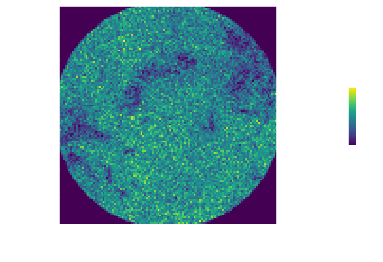

In [15]:
gridy,gridx = np.mgrid[-0.1:0.3:0.003472222, 2.3:2.7:0.003472222]
his,xe,ye = np.histogram2d(testc.galactic.l.wrap_at(180*u.deg).deg, testc.galactic.b.deg, bins=[gridx[0,:], gridy[:,0]])

fig = plt.figure(1)
fig.clf()
ax = fig.gca()
plt.imshow(his.T, extent=[xe.min(),xe.max(),ye.min(),ye.max()])
ax.set_aspect('equal') #gridx.shape[1]/gridx.shape[0])
cax = fig.add_axes([0.93, 0.4, 0.02, 0.2])
plt.colorbar(cax=cax)

ax.set_xlabel("Galactic Longitude")
ax.set_ylabel("Galactic Latitude")

In [16]:
test["Hmag3"]

15.736
15.832
--
15.525
15.377
13.806
15.911
15.446
14.784
15.272
15.999


In [17]:
test1 = Vizier.query_region(SkyCoord(2.5*u.deg, 0.1*u.deg, frame='galactic'), 
                           radius=12.5*u.arcmin, catalog=["II/337", "II/348"])

In [18]:
test1[1][0]["Ksmag3"]

14.272

# Imaging the Stars

In [19]:
%run functions.py

<Figure size 432x288 with 0 Axes>

# Filter Color Systematic Offset (FCSO)

## Paranal
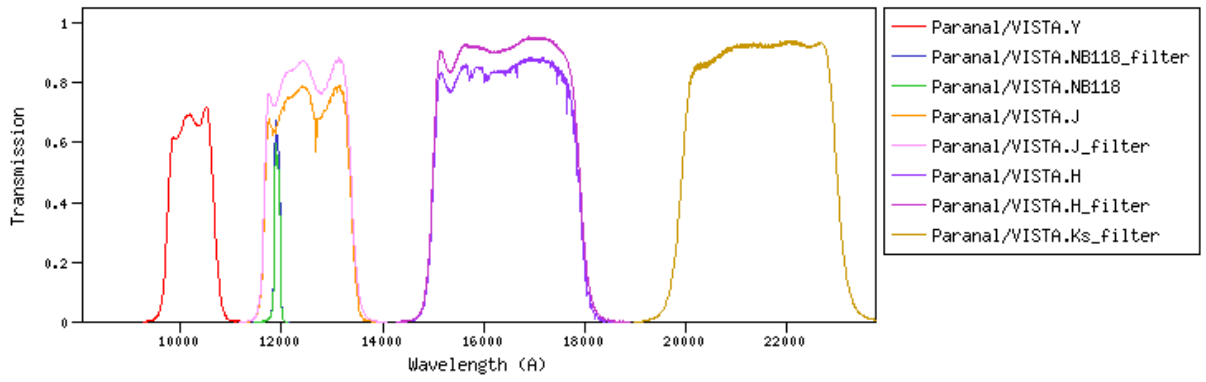


$H: \lambda_{mean}=16508.7$     $Zpt=1026.4(Jy)$
$$ $$
$Ks: \lambda_{mean}=21527.6$     $Zpt=672.6(Jy)$


## 2MASS
![graph of filters and their wavelengths](2mass.png)


$H: \lambda_{mean}=16620.0$     $Zpt=1024.0(Jy)$
$$ $$
$Ks: \lambda_{mean}=21590.0$     $Zpt=666.8(Jy)$

In [20]:
%run get_and_plot_vizier_nir.py

ERROR:root:File `'get_and_plot_vizier_nir.py'` not found.


In [21]:
stars_background_im, turbulent_stars, turbulence, header = get_and_plot_vizier_nir()

NameError: name 'get_and_plot_vizier_nir' is not defined

In [ ]:
plt.figure(figsize=(20,20))
plt.imshow(stars_background_im,
          norm=visualization.simple_norm(stars_background_im, stretch='asinh',
                                         max_percent=99, min_percent=1))

In [ ]:
stars_background_im_offset, turbulent_stars_offset, turbulence_offset, header_offset = get_and_plot_vizier_nir(wavelength=18800)

In [ ]:
plt.figure(figsize=(20,20))
plt.imshow(stars_background_im_offset,
          norm=visualization.simple_norm(stars_background_im, stretch='asinh',
                                         max_percent=99, min_percent=1))

In [ ]:
fcso = stars_background_im - stars_background_im_offset

In [ ]:
plt.figure(figsize=(20,20))
plt.imshow(fcso)

In [ ]:
noise = np.sqrt(stars_background_im)

In [ ]:
fcso_noise = fcso/noise

In [ ]:
fsco_noise_10 = np.percentile(fcso_noise, 10)
fsco_noise_25 = np.percentile(fcso_noise, 25)
fsco_noise_50 = np.percentile(fcso_noise, 50)
fsco_noise_75 = np.percentile(fcso_noise, 75)
fsco_noise_90 = np.percentile(fcso_noise, 90)

In [ ]:
fsco_noise_10, fsco_noise_25, fsco_noise_50, fsco_noise_75, fsco_noise_90

In [ ]:
m_zpt = (666.8 - 1024.0)/(21590.0 - 16620.0)
zpt = (m_zpt*(18800 - 16620.0) + 1024.0)
zpt